In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as st

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

In [2]:
data = pd.read_csv('cookie_cats.csv')

In [3]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## Exploratory Data Analysis

In [6]:
def display(file):
    print('------------Dimensions------------')
    print(f"# Observations: {file.shape[0]}, # Columns: {file.shape[1]}")
    print('------------Missing Values------------')
    print(np.where(file.isnull().values.any()==False, "No Missing Values!", "Data includes missing Values!"))

In [7]:
display(data)

------------Dimensions------------
# Observations: 90189, # Columns: 5
------------Missing Values------------
No Missing Values!


In [9]:
# No. of unique users

data.userid.nunique()

90189

In [13]:
data.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 1])[['sum_gamerounds']]

,sum_gamerounds
count,90189.0000
mean,51.8725
std,195.0509
min,0.0000
1%,0.0000
5%,1.0000
10%,1.0000
25%,5.0000
50%,16.0000
75%,51.0000


In [18]:
#A/B Groups and Summary Stats

data.groupby("version").sum_gamerounds.agg(['count', 'mean', 'median', 'std', 'max'])

,count,mean,median,std,max
version,,,,,
gate_30,44700,52.4563,17,256.7164,49854
gate_40,45489,51.2988,16,103.2944,2640


Text(0.5, 0.98, 'Before Removing the Extreme Values\n')

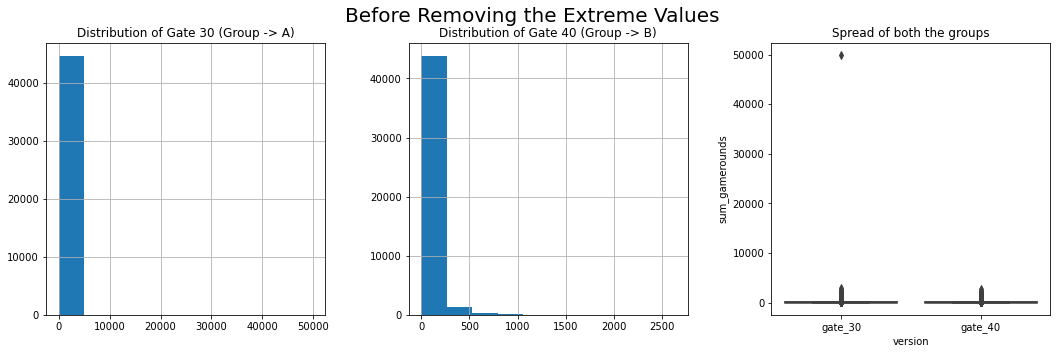

In [21]:
fig, axes = plt.subplots(1,3, figsize=(18,5))

data[data.version=='gate_30'].hist('sum_gamerounds', ax = axes[0])
data[data.version=='gate_40'].hist('sum_gamerounds', ax = axes[1])
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[2])

axes[0].set_title('Distribution of Gate 30 (Group -> A)')
axes[1].set_title('Distribution of Gate 40 (Group -> B)')
axes[2].set_title('Spread of both the groups')
plt.suptitle("Before Removing the Extreme Values\n", fontsize = 20)

<AxesSubplot:>

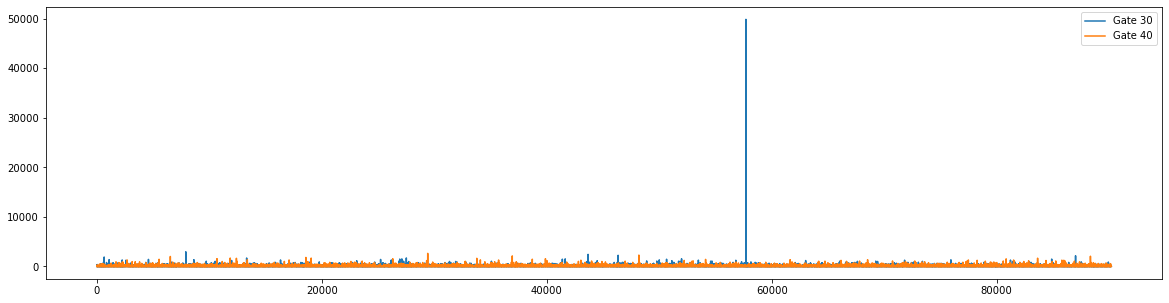

In [24]:
data[data.version=='gate_30'].sum_gamerounds.plot(legend = True, label = 'Gate 30', figsize = (20,5))
data[data.version=='gate_40'].sum_gamerounds.plot(legend = True, label = 'Gate 40')

In [25]:
## Removing Extreme Values

data = data[data.sum_gamerounds<data.sum_gamerounds.max()]

In [26]:
data.describe([0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 1])[['sum_gamerounds']]

,sum_gamerounds
count,90188.0000
mean,51.3203
std,102.6827
min,0.0000
1%,0.0000
5%,1.0000
10%,1.0000
25%,5.0000
50%,16.0000
75%,51.0000


Text(0.5, 0.98, 'After removing the extreme values')

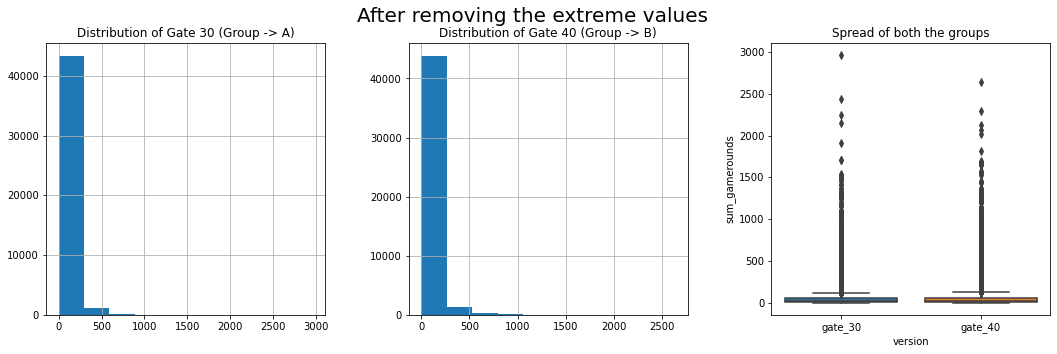

In [28]:
fig, axes = plt.subplots(1,3, figsize = (18,5))
data[data.version=='gate_30'].hist('sum_gamerounds', ax = axes[0])
data[data.version=='gate_40'].hist('sum_gamerounds', ax = axes[1])
sns.boxplot(x = data.version, y = data.sum_gamerounds, ax = axes[2])

axes[0].set_title('Distribution of Gate 30 (Group -> A)')
axes[1].set_title('Distribution of Gate 40 (Group -> B)')
axes[2].set_title('Spread of both the groups')
plt.suptitle('After removing the extreme values', fontsize = 20)

<AxesSubplot:>

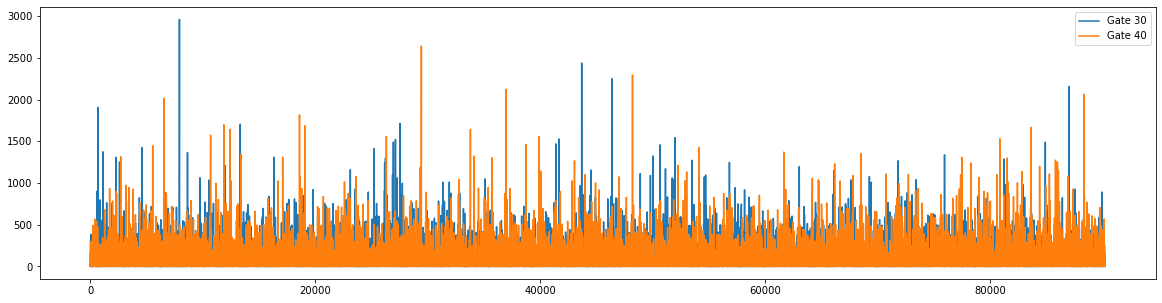

In [29]:
data[data.version=='gate_30'].sum_gamerounds.plot(legend = True, label = 'Gate 30', figsize = (20,5))
data[data.version=='gate_40'].sum_gamerounds.plot(legend = True, label = 'Gate 40')

In [30]:
data[data.sum_gamerounds==0].shape[0]

3994

3994 people installed but never played the game, out of the total 90189 unique players. 

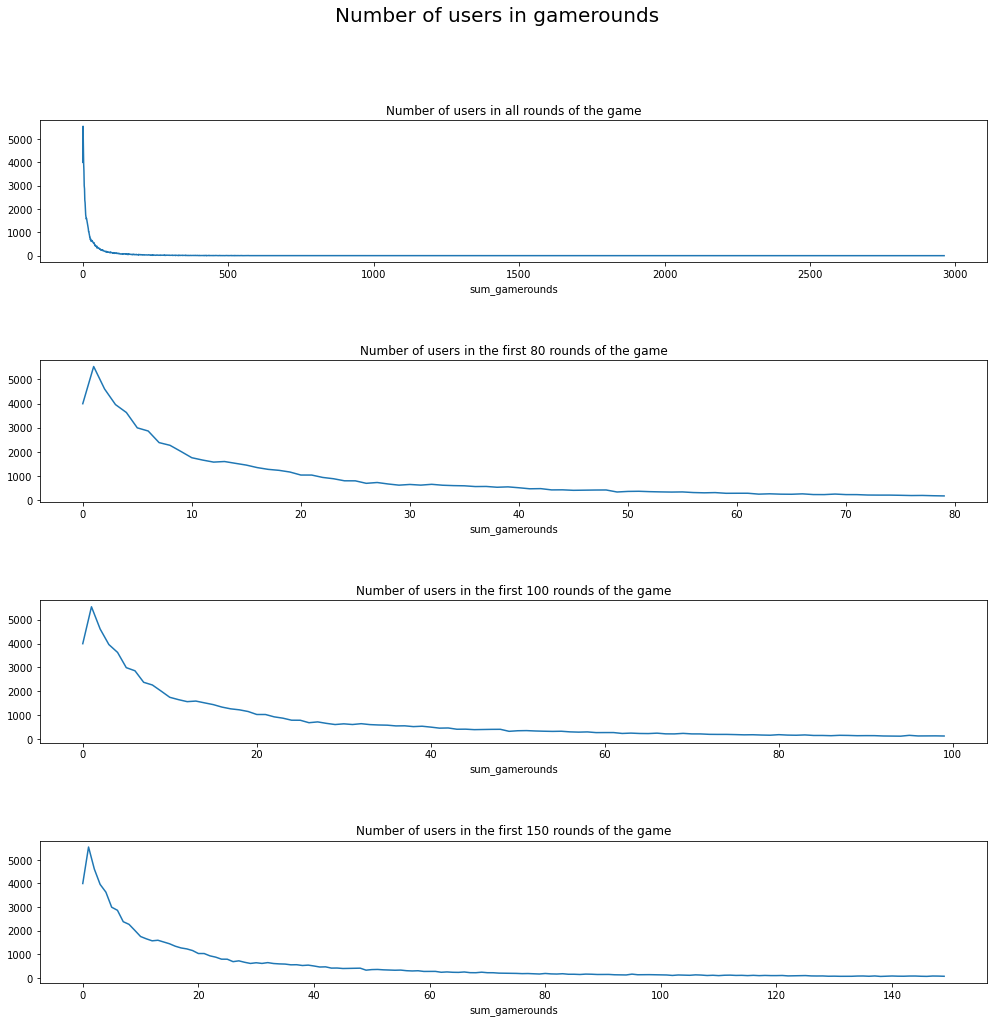

In [45]:
fig, axes = plt.subplots(4,1, figsize = (15,15))
data.groupby('sum_gamerounds').userid.count().plot(ax = axes[0])
data.groupby('sum_gamerounds').userid.count()[:80].plot(ax = axes[1])
data.groupby('sum_gamerounds').userid.count()[:100].plot(ax = axes[2])
data.groupby('sum_gamerounds').userid.count()[:150].plot(ax = axes[3])
plt.suptitle('Number of users in gamerounds', fontsize = 20)
axes[0].set_title('Number of users in all rounds of the game')
axes[1].set_title('Number of users in the first 80 rounds of the game')
axes[2].set_title('Number of users in the first 100 rounds of the game')
axes[3].set_title('Number of users in the first 150 rounds of the game')
plt.tight_layout(pad = 5)

As the rounds progresses, the number of users steeply decreases. People either stop due to increasing difficulty or they lose interest in the game - a problem for perhaps the development team to handle.

In [34]:
data.groupby('sum_gamerounds').userid.count()

sum_gamerounds
0       3994
1       5538
2       4606
3       3958
4       3629
        ... 
2251       1
2294       1
2438       1
2640       1
2961       1
Name: userid, Length: 941, dtype: int64

In [47]:
data.groupby('sum_gamerounds').userid.count().head(25)

sum_gamerounds
0     3994
1     5538
2     4606
3     3958
4     3629
5     2992
6     2861
7     2379
8     2267
9     2013
10    1752
11    1654
12    1570
13    1594
14    1519
15    1446
16    1342
17    1269
18    1228
19    1158
20    1033
21    1032
22     934
23     879
24     794
Name: userid, dtype: int64

In [48]:
## Checking whether the test and the control group are statistically similar or not

data.groupby('version').sum_gamerounds.agg(['count', 'mean', 'median', 'std', 'max'])

,count,mean,median,std,max
version,,,,,
gate_30,44699,51.3421,17,102.0576,2961
gate_40,45489,51.2988,16,103.2944,2640


As it is seen, the test and the control group are more or less similar, apparently. 

In [50]:
# Checking the retention to the game - how many people came back to play the game after 1 day of installation
# (retention_1) and how many people can to play even after 7 days of installation (retention_7)

pd.DataFrame({'Retention_1_Count':data['retention_1'].value_counts(),
              'Retention_7_Count':data['retention_7'].value_counts(),
              'Retention_1_Ratio':data['retention_1'].value_counts()/len(data),
              'Retention_7_Ratio':data['retention_7'].value_counts()/len(data)})

,Retention_1_Count,Retention_7_Count,Retention_1_Ratio,Retention_7_Ratio
False,50035,73408,0.5548,0.8139
True,40153,16780,0.4452,0.1861


In [51]:
data.groupby(['version', 'retention_1']).sum_gamerounds.agg(['count', 'mean', 'median', 'std', 'max'])

count    mean  median      std   max
version retention_1                                      
gate_30 False        24665 16.3591       6  36.5284  1072
        True         20034 94.4117      48 135.0377  2961
gate_40 False        25370 16.3404       6  35.9258  1241
        True         20119 95.3812      49 137.8873  2640

In [53]:
data.groupby(['version', 'retention_7']).sum_gamerounds.agg(['count', 'mean', 'median', 'std', 'max'])

count     mean  median      std   max
version retention_7                                       
gate_30 False        36198  25.7965      11  43.3162   981
        True          8501 160.1175     105 179.3586  2961
gate_40 False        37210  25.8564      11  44.4061  2640
        True          8279 165.6498     111 183.7925  2294

In [54]:
## A/B Testing

data['version'] = np.where(data.version=='gate_30', 'A', 'B')

In [55]:
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [57]:
def AB_Test(dataframe, group, target):
    
    # Packages
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
AB_Test(dataframe=data, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.0254,A/B groups are not similar!
